# Análise de Modelos: Regressão Logística e Random Forest

# 1 Implementar mais um novo modelo de machine learning e acuracia OK
# 2 - Copilot, você vai fazer perguntas pelo menosumas 5, insight sobre seu arquivo, pode referenciar o link do kagle. OK
# 3 - responder as perguntas, colocar mais graficos, 5 de cada modelo, seaborn voce consegue pegar os 3 graficos e dividir em tela, tudo na mesma tela. 
# 4 ~organização dos titulos.
# 5 - Você todos esses graficos, crie um relatorio o que vc fez. e nao esqueça di diagrama o plano.



Perguntas para serem utilizadas como script: 
1- Quais algoritmos de Machine Learning apresentam maior acurácia na detecção de phishing, e como cada um se compara em termos de desempenho? OK

2- Quais são as vantagens e desvantagens dos modelos utilizados? OK

3- Quais desafios ou limitações foram encontrados na aplicação de Machine Learning para detecção de phishing e como eles podem ser contornados? 

4- Como o uso de algoritmos de Machine Learning para detecção de phishing pode evoluir no futuro, considerando aspectos éticos e legais? 


Perguntas a serem respondidas com gráficos:
1- Taxa de acuracia de cada algoritmo Gráfico sugerido: Gráfico de barras comparando a acurácia de cada algoritmo. 
 
2- Como a taxa de falsos positivos e falsos negativos varia entre os diferentes algoritmos usados na detecção de phishing? Gráfico sugerido: Gráfico de barras ou gráfico de linhas com a taxa de falsos positivos e falsos negativos para cada algoritmo.

3- Como o tempo de execução para treinamento e teste dos modelos varia entre os algoritmos utilizados? 

In [101]:

# Importação de Bibliotecas
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import confusion_matrix, recall_score, f1_score, precision_score
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
from scipy.sparse import csr_matrix
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from nltk.tokenize import RegexpTokenizer
from nltk.stem import SnowballStemmer
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import time

In [32]:
file_path = 'malicious_phish.csv'
df = pd.read_csv(file_path)

In [33]:
df.fillna(df.mode().iloc[0], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651191 entries, 0 to 651190
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   url     651191 non-null  object
 1   type    651191 non-null  object
dtypes: object(2)
memory usage: 9.9+ MB


In [34]:
df.head(10)
df.describe()

,url,type
count,651191,651191
unique,641119,4
top,http://style.org.hc360.com/css/detail/mysite/s...,benign
freq,180,428103


In [35]:
types = df['type'].values
counter_types = Counter(types)
type_names = list(counter_types.keys())
type_values = list(counter_types.values())

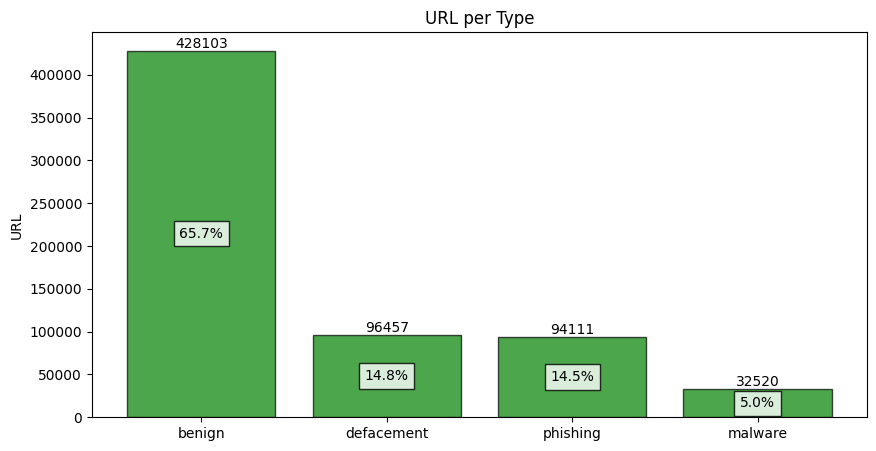

In [36]:
sorted_indices = np.argsort(type_values)[::-1]
type_names = [type_names[i] for i in sorted_indices]
type_values = [type_values[i] for i in sorted_indices]

total_count = sum(type_values)
percentages = [value / total_count * 100 for value in type_values]

y_pos = np.arange(len(type_names))
plt.figure(1, figsize=(10, 5))
bars = plt.bar(y_pos, type_values, align='center', alpha=0.7, color='green', edgecolor='black')

for bar, value, percentage in zip(bars, type_values, percentages):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{value}', ha='center', va='bottom')
    plt.text(bar.get_x() + bar.get_width() / 2, height / 2, f'{percentage:.1f}%', ha='center', va='center',
             bbox=dict(facecolor='white', alpha=0.8, edgecolor='black'))

plt.xticks(y_pos, type_names)
plt.ylabel('URL')
plt.title('URL per Type')
plt.show()

In [37]:
tokenizer = RegexpTokenizer(r'[A-Za-z]+')
df['text_tokenized'] = df.url.map(lambda t: tokenizer.tokenize(t))


In [38]:
stemmer = SnowballStemmer("english")
df['text_stemmed'] = df['text_tokenized'].map(lambda l: [stemmer.stem(word) for word in l])
df['text_sent'] = df['text_stemmed'].map(lambda l: ' '.join(l))

In [39]:
CountVectorize = CountVectorizer()
feat = CountVectorize.fit_transform(df.text_sent)
feat[:5].toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
trainX, testX, trainY, testY = train_test_split(feat, df.type, test_size=0.3, random_state=42)

In [41]:
# smote liba
smote = SMOTE(random_state=42)
trainX_smote, trainY_smote = smote.fit_resample(trainX, trainY)

In [42]:
tempo_lr_inicio = time.time()


lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(trainX_smote, trainY_smote)
y_pred_lr = lr.predict(testX)


tempo_lr_fim = time.time()
tempo_exec_lr = tempo_lr_fim - tempo_lr_inicio
print(f'{tempo_exec_lr:.2f} Segundos')

64.65 Segundos


In [43]:
# Modelo de Linear Regression
tempo_lreg_inicio = time.time()
one_hot_encoder = OneHotEncoder()
trainY_encoded = one_hot_encoder.fit_transform(trainY_smote.values.reshape(-1, 1)).toarray()
tempo_lreg_inicio = time.time()
reg = LinearRegression()
reg.fit(trainX_smote, trainY_encoded)
tempo_lreg_fim = time.time()
y_pred_reg = reg.predict(testX)
y_pred_reg_labels = one_hot_encoder.inverse_transform(y_pred_reg)

tempo_lreg_fim = time.time()
tempo_exec_lreg = (tempo_lr_fim - tempo_lr_inicio)
print(f'{tempo_exec_lreg:.2f} Segundos')

64.65 Segundos


In [44]:
#fazer diagrama explicando a estrutura do codigo, (procurar exemplos de data lake) 

#| Da onde coletei Kagle | -> [Insights] -> [ Exportei csv pro meu codigo usando pandas] ->  [limpeza dos dados] -> [Processamento - Perfomance] -> [Treinamento ML] -> [Teste de acuracia] -> |visualização de dados,grafic, resposta dos insight], 

In [45]:
tempo_lsvc_inicio = time.time()

svc = LinearSVC()
svc.fit(trainX_smote, trainY_smote)
y_pred_svc = svc.predict(testX)

tempo_lsvc_fim = time.time()
tempo_exec_lsvc = (tempo_lsvc_fim - tempo_lsvc_inicio)
print(f'{tempo_exec_lsvc:.2f} Segundos')

768.21 Segundos


In [46]:
tempo_nb_inicio = time.time()


nb = BernoulliNB()
nb.fit(trainX_smote, trainY_smote)
y_pred_nb = nb.predict(testX)


tempo_nb_fim = time.time()
tempo_exec_nb = (tempo_nb_fim - tempo_nb_inicio)
print(f'{tempo_exec_nb:.2f} Segundos')

2.55 Segundos


In [47]:
tempo_dtc_inicio = time.time()


dt = DecisionTreeClassifier()
dt.fit(trainX_smote, trainY_smote)
y_pred_dt = dt.predict(testX)


tempo_dtc_fim = time.time()
tempo_exec_dtc = (tempo_dtc_fim - tempo_dtc_inicio)
print(f'{tempo_exec_dtc:.2f} Segundos')

682.93 Segundos


In [ ]:
# Comparação final das acurácias
accuracy_lr = lr.score(testX, testY)
accuracy_reg = np.mean(y_pred_reg_labels.ravel() == testY.values)
accuracy_LSVC = svc.score(testX, testY)
accuracy_nbb = nb.score(testX, testY)
accuracy_dt = dt.score(testX, testY)

recall_lr = recall_score(testY, y_pred_lr, average='micro')
recall_reg = recall_score(testY, y_pred_reg_labels, average='micro')
recall_lsvc = recall_score(testY, y_pred_svc, average='micro')
recall_nbb = recall_score(testY, y_pred_nb, average='micro')
recall_dt = recall_score(testY, y_pred_dt, average='micro')

f1_lr = f1_score(testY, y_pred_lr, average='micro')
f1_reg = f1_score(testY, y_pred_reg_labels, average='micro')
f1_lsvc = f1_score(testY, y_pred_svc, average='micro')
f1_nbb = f1_score(testY, y_pred_nb, average='micro')
f1_dt = f1_score(testY, y_pred_dt, average='micro')

precision_lr = precision_score(testY, y_pred_lr, average='micro')
precision_reg = precision_score(testY, y_pred_reg_labels, average='micro')
precision_lsvc = precision_score(testY, y_pred_svc, average='micro')
precision_nbb = precision_score(testY, y_pred_nb, average='micro')
precision_dt = precision_score(testY, y_pred_dt, average='micro')

# cr_lr = classification_report(testY, y_pred_lr)
# cr_reg = classification_report(testY, y_pred_reg_labels)
# cr_lsvc = classification_report(testY, y_pred_svc)
# cr_nbb = classification_report(testY, y_pred_nb)
# cr_dt = classification_report(testY, y_pred_dt)


comparacao_modelos = pd.DataFrame({
    'Modelo': ['Regressão Logistica', 'Regressão Linear', 'Linear SVC', 'Bernoulli Naive Bayes', 'Decision Tree Classifier'],
    'Acuracia (%)': [accuracy_lr, accuracy_reg, accuracy_LSVC, accuracy_nbb, accuracy_dt],
    'F1 Score (%)':[f1_lr, f1_reg, f1_lsvc, f1_nbb, f1_dt],
    'Precision Score (%)':[precision_lr, precision_reg, precision_lsvc, precision_nbb, precision_dt],
    'Recall (%)':[recall_lr, recall_reg, recall_lsvc, recall_nbb, recall_dt],
    'Tempo de Execuçao (s)': [tempo_exec_lr,tempo_exec_lreg,tempo_exec_lsvc, tempo_exec_nb, tempo_exec_dtc]
})

print(comparacao_modelos)
#print(f'Relatórios:\n Linear Regression:\n{cr_lr}\nLogistic Regression:\n{cr_reg}\nLinear SVC:\n{cr_lsvc}\nBernoulli NB:\n{cr_nbb}\nDTC:\n{cr_dt}')

                     Modelo  Acuracia (%)  F1 Score  Precision Score  \
0       Regressão Logistica      0.918519  0.918519         0.918519   
1          Regressão Linear      0.837452  0.837452         0.837452   
2                Linear SVC      0.907964  0.907964         0.907964   
3     Bernoulli Naive Bayes      0.844977  0.844977         0.844977   
4  Decision Tree Classifier      0.876985  0.876985         0.876985   

     Recall  Tempo de Execuçao (s)  
0  0.918519              64.653023  
1  0.837452              64.653023  
2  0.907964             768.209273  
3  0.844977               2.554144  
4  0.876985             682.933375  


# Confusion Matrix

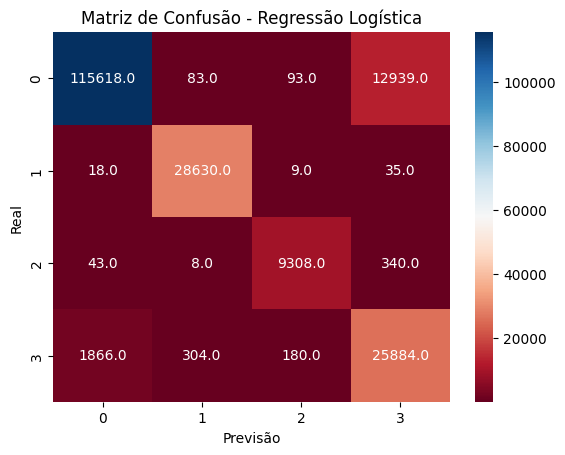

In [49]:
CM_LR = confusion_matrix(testY, y_pred_lr)
sns.heatmap(CM_LR, annot=True, fmt=".1f", cmap="RdBu")
plt.title('Matriz de Confusão - Regressão Logística')
plt.xlabel('Previsão')
plt.ylabel('Real')
plt.show()

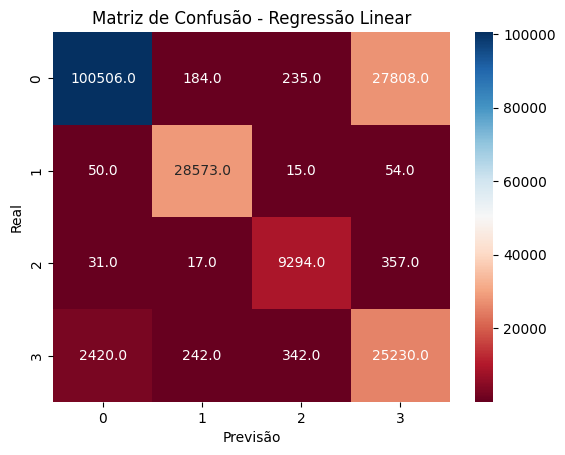

In [50]:
CM_LR = confusion_matrix(testY, y_pred_reg_labels)
sns.heatmap(CM_LR, annot=True, fmt=".1f", cmap="RdBu")
plt.title('Matriz de Confusão - Regressão Linear')
plt.xlabel('Previsão')
plt.ylabel('Real')
plt.show()

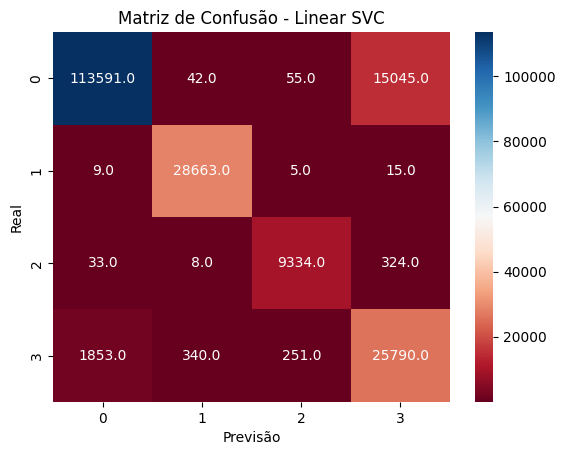

In [51]:
CM_LR = confusion_matrix(testY, y_pred_svc)
sns.heatmap(CM_LR, annot=True, fmt=".1f", cmap="RdBu")
plt.title('Matriz de Confusão - Linear SVC')
plt.xlabel('Previsão')
plt.ylabel('Real')
plt.show()

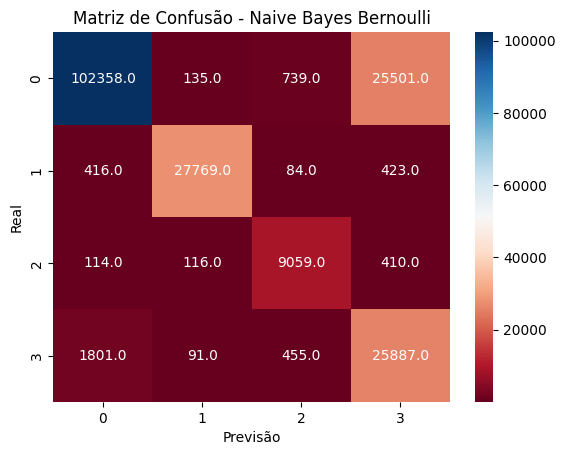

In [52]:
CM_LR = confusion_matrix(testY, y_pred_nb)
sns.heatmap(CM_LR, annot=True, fmt=".1f", cmap="RdBu")
plt.title('Matriz de Confusão - Naive Bayes Bernoulli')
plt.xlabel('Previsão')
plt.ylabel('Real')
plt.show()

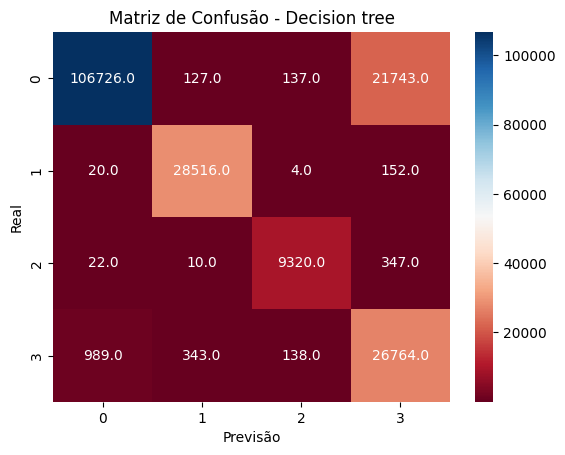

In [53]:
CM_LR = confusion_matrix(testY, y_pred_dt)
sns.heatmap(CM_LR, annot=True, fmt=".1f", cmap="RdBu")
plt.title('Matriz de Confusão - Decision tree')
plt.xlabel('Previsão')
plt.ylabel('Real')
plt.show()

# 1- Quais algoritmos de Machine Learning apresentam maior acurácia na detecção de phishing, e como cada um se compara em termos de desempenho?

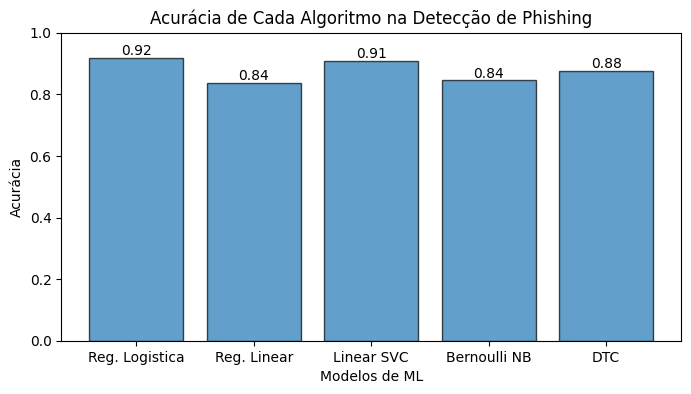

In [54]:
acuracia = [accuracy_lr, accuracy_reg, accuracy_LSVC, accuracy_nbb, accuracy_dt]
modelos = ['Reg. Logistica', 'Reg. Linear', 'Linear SVC', 'Bernoulli NB', 'DTC']

plt.figure(1, figsize=(8, 4))
barras = plt.bar(modelos, acuracia, align='center', alpha=0.7, edgecolor='black')
plt.ylim(0, 1)

for index, valor in enumerate(acuracia):
    plt.text(index, valor + 0.01, f'{valor:.2f}', ha='center')


plt.title('Acurácia de Cada Algoritmo na Detecção de Phishing')
plt.ylabel('Acurácia')
plt.xlabel('Modelos de ML')
plt.show()


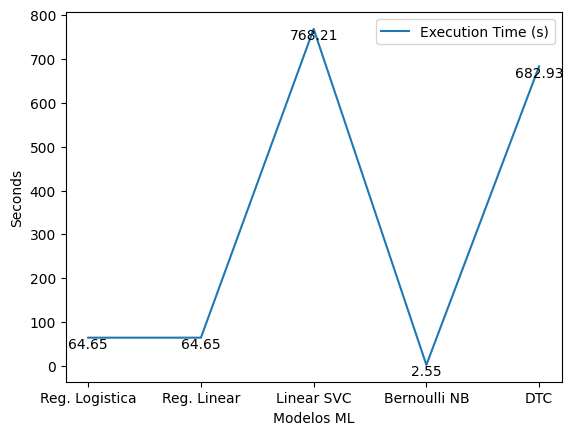

In [81]:
models = ['Reg. Logistica', 'Reg. Linear', 'Linear SVC', 'Bernoulli NB', 'DTC']
time = [tempo_exec_lr,tempo_exec_lreg,tempo_exec_lsvc, tempo_exec_nb, tempo_exec_dtc]

plt.plot(models, time, label='Execution Time (s)')
for index, valor in enumerate(time):
    plt.text(index, valor + 0.01, f'{valor:.2f}', ha='center', va='top')
plt.ylabel('Seconds')
plt.xlabel('Modelos ML')
plt.legend()
plt.show()